The dice game
=============

Rules:


1. Role two dice, one red, one blue.
1. There are seven players. Six are assigned to the numbers on the red die, one is given a number from the blue die.
1. Each player gets a point if their number is selected on the correctly coloured die.

a) What is the probability of a red / blue player being the first to 10 points?

b) What is the probability of a red / blue player being the last to 10 points?

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
def plot_boxes(codes):
    nums = [c[0] for c in codes]
    colours = [c[1:] for c in codes]

    # Define the size of the boxes and spacing
    box_size = 1
    spacing = 0.1
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10,5))
    
    # Draw the boxes with numbers
    x, y = spacing, spacing
    for i, (num, color) in enumerate(zip(nums, colours), 1):
        rect = patches.Rectangle((x, y), box_size, box_size, linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(rect)
        # Add the number inside the box
        plt.text(x + box_size / 2, y + box_size / 2, str(num), color="white", ha='center', va='center', fontsize=12, weight='bold')
        x += box_size + spacing
        if x + box_size + spacing > 14 * (box_size + spacing):  # Adjust if more than 12 boxes in one row
            x = spacing
            y += box_size + spacing
    
    # Set the limits and aspect ratio
    ax.set_xlim(0, max([len(nums), 10]) * (box_size + spacing))
    ax.set_ylim(0, 1 * (box_size + spacing))
    ax.set_aspect('equal')

    # Remove the axes for a cleaner look
    ax.axis('off')

    fig.tight_layout()

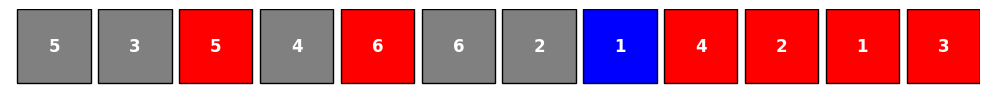

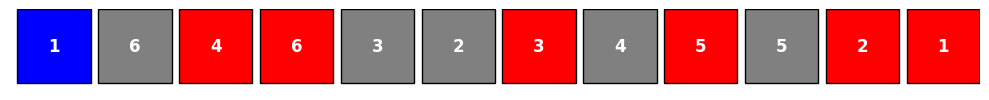

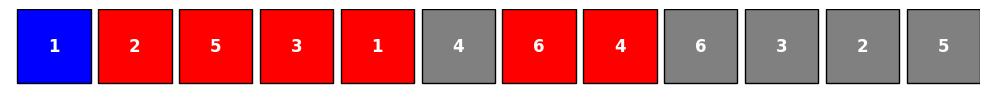

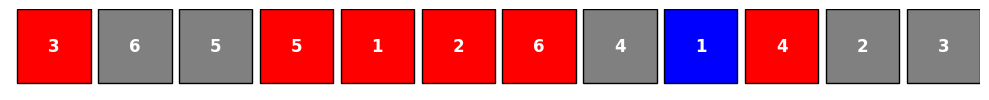

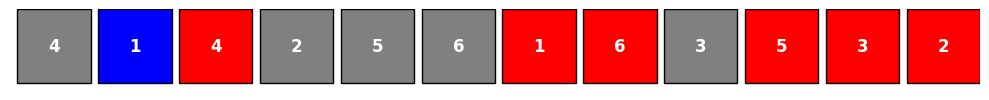

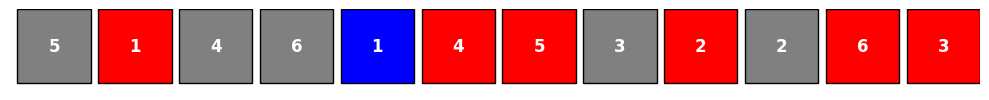

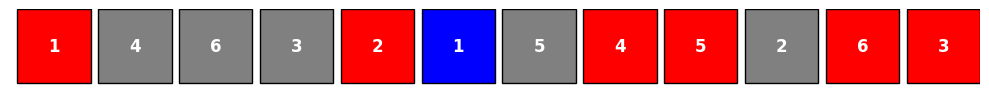

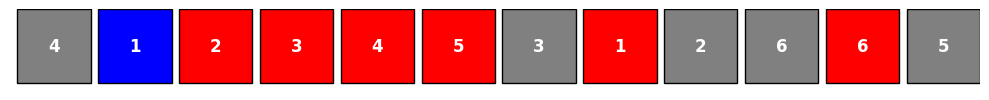

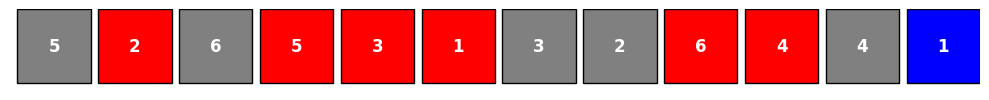

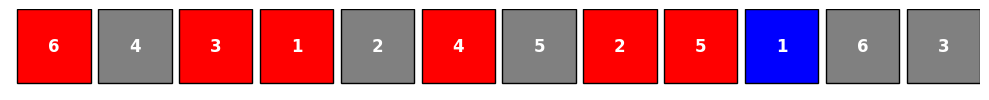

In [3]:
options = [
    "1red",
    "2red",
    "3red",
    "4red",
    "5red",
    "6red",
    "1blue",
    "2grey",
    "3grey",
    "4grey",
    "5grey",
    "6grey"
]

repeats = 10

for _ in range(repeats):
    o = options.copy()
    np.random.shuffle(o)
    plot_boxes(o)


In [4]:
winning_roll = 10

def simulate(winning_roll=10):
    reds = {k:0 for k in range(1,7)}
    blues = {k:0 for k in range(1,7)}
    
    while True:
        red_roll = np.random.randint(1,7)
        reds[red_roll] += 1
    
        if reds[red_roll] >= winning_roll:
            return (True, red_roll)
        
        blue_roll = np.random.randint(1,7)
        blues[blue_roll] += 1
    
        if blues[blue_roll] >= winning_roll and blue_roll == 1:
            return (False, blue_roll)

simulate()

(True, 4)

In [5]:
N = 1000
results = [simulate(winning_roll=100) for _ in range(N)]
red_wins, winning_number = zip(*results)

red_wins = np.array(red_wins)
winning_number = np.array(winning_number)

In [6]:
blue_prob = sum(~red_wins)/N
red_prob = sum(red_wins & (winning_number == 6)) / N

blue_odds = 1 / blue_prob
red_odds = 1 / red_prob

print(f"Blue no 1 wins 1 in {blue_odds:.2f} times")
print(f"Red no 1 wins 1 in {red_odds:.2f} times")

Blue no 1 wins 1 in 8.33 times
Red no 1 wins 1 in 6.94 times


In [7]:
blue_prob

0.12

In [8]:
N / (sum(red_wins)/6)

6.818181818181818

In [9]:
def run_many(winning_roll, N):
    results = [simulate(winning_roll=winning_roll) for _ in range(N)]
    red_wins, winning_number = zip(*results)
    red_wins = np.array(red_wins)
    winning_number = np.array(winning_number)
    
    return red_wins, winning_number

def summarize(red_wins, winning_number):
    N = len(red_wins)
    prob_red_win = sum(red_wins) / 6 / N
    # prob_red_win = sum(red_wins & (winning_number == 1)) / N
    prob_blue_win = sum(~red_wins & (winning_number == 1)) / N

    return prob_red_win, prob_blue_win
    
def simulate_and_summarise(winning_roll, N):
    red_wins, winning_number = run_many(winning_roll=winning_roll, N=N)
    prob_red_win, prob_blue_win = summarize(red_wins, winning_number)

    return prob_red_win, prob_blue_win

In [10]:
simulate_and_summarise(10, 1000)

(0.15, 0.1)

In [21]:
target = np.logspace(0, 3, 10)
results_raw = [run_many(t, 1000) for t in target]

In [23]:
results = [summarize(*r) for r in results_raw]

/tmp/ipykernel_1586/3172186770.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.semilogx(target, 1/prob_blue, 'b')


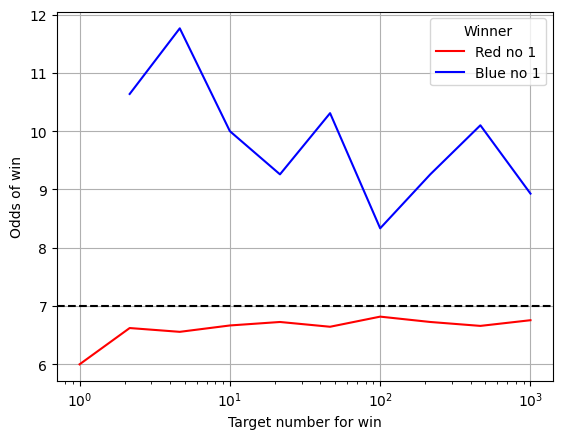

In [30]:
prob_red, prob_blue = zip(*results)
prob_red = np.array(prob_red)
prob_blue = np.array(prob_blue)

plt.semilogx(target, 1/prob_red, 'r')
plt.semilogx(target, 1/prob_blue, 'b')
plt.axhline(7, linestyle='--', color='black')

plt.legend(["Red no 1", "Blue no 1"], title="Winner")
plt.xlabel("Target number for win")
plt.ylabel("Odds of win")
plt.grid(True)